In [2]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

In [32]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_train.csv')

In [33]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [41]:
train_x = train_df.iloc[:,1:].to_numpy()
train_y = train_df.iloc[:,0].to_numpy()
test_x = test_df.iloc[:,1:].to_numpy()
test_y = test_df.iloc[:,0].to_numpy()

In [42]:
train_x = train_x.reshape([-1,28,28,1])
train_x = train_x / 255

In [43]:
test_x = test_x.reshape([-1,28,28,1])
test_x = test_x / 255

In [44]:
# (train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [46]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))
# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 10816)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               1384576   
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [48]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.4033 - accuracy: 0.8555 - val_loss: 0.3065 - val_accuracy: 0.8919
Epoch 2/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2762 - accuracy: 0.8987 - val_loss: 0.3000 - val_accuracy: 0.8914
Epoch 3/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2283 - accuracy: 0.9161 - val_loss: 0.2653 - val_accuracy: 0.9073
Epoch 4/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1942 - accuracy: 0.9288 - val_loss: 0.2561 - val_accuracy: 0.9080
Epoch 5/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.1646 - accuracy: 0.9402 - val_loss: 0.2622 - val_accuracy: 0.9134


In [49]:
loss, acc = model.evaluate(test_x, test_y)
print(loss)
print(acc)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1573 - accuracy: 0.9435
0.157253697514534
0.9435499906539917


In [50]:
import matplotlib.pyplot as plt
# To know the labels list
def check_label(id_,labels):
    label = train_y[id_]
    if label not in labels:
        plt.imshow(train_x[id_])
        print("Label Value:",label)
        plt.show()
    return label

Label Value: 2


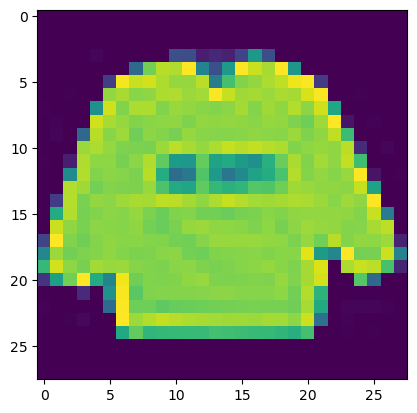

Label Value: 9


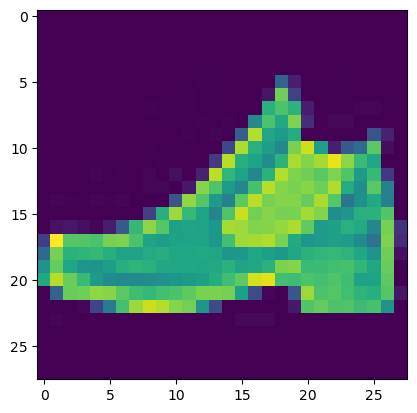

Label Value: 6


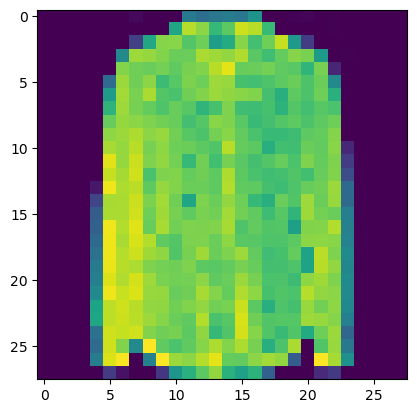

Label Value: 0


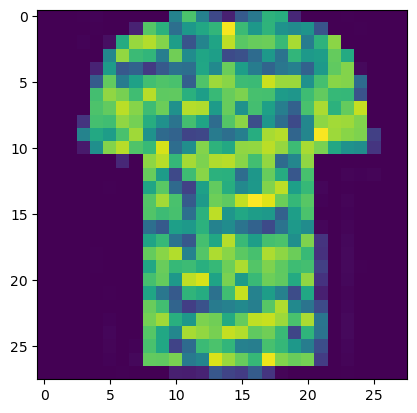

Label Value: 3


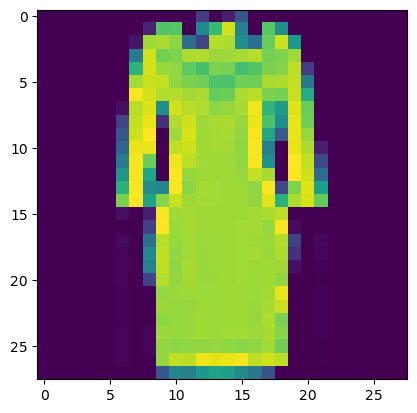

Label Value: 4


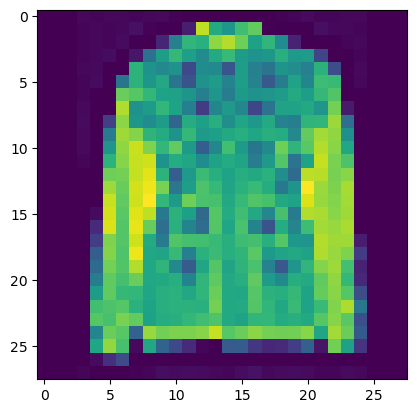

Label Value: 5


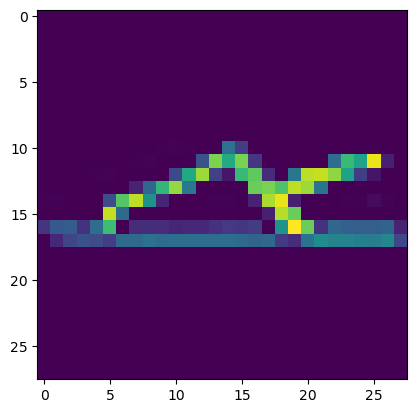

Label Value: 8


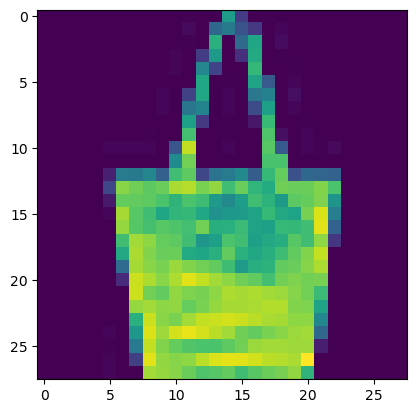

Label Value: 7


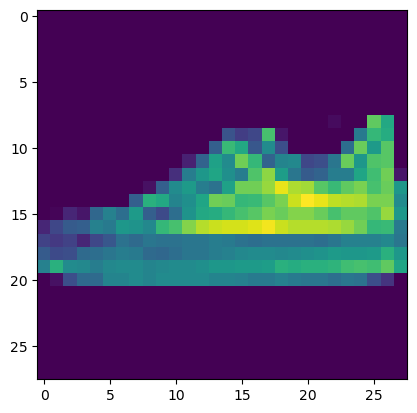

Label Value: 1


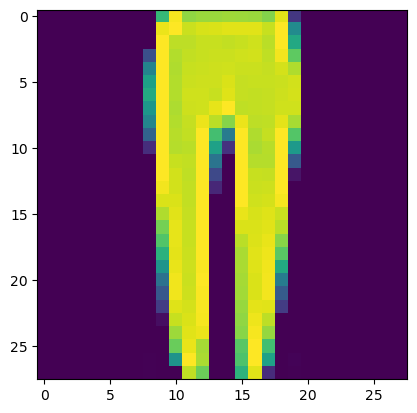

In [51]:
#To know unqiue Labels 
labels=[]
i=0;
while len(labels)<10:
    label = check_label(i,labels)
    if label not in labels:
        labels.append(label)
    i+=1

In [17]:
labels

[9, 0, 3, 2, 7, 5, 1, 6, 4, 8]

In [15]:
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] 
    predictions = model.predict(test_x[id_:id_+1])  # uses array slicing test_x[id_:id_+1] to select the image at index id_ from the test_x dataset
    label = labels[np.argmax(predictions)]   #  find the index of the highest predicted probability in the predictions array.
    print(label)
    plt.imshow(test_x[id_])
    plt.show()

1/1 [==============================] - 0s 18ms/step
trouser


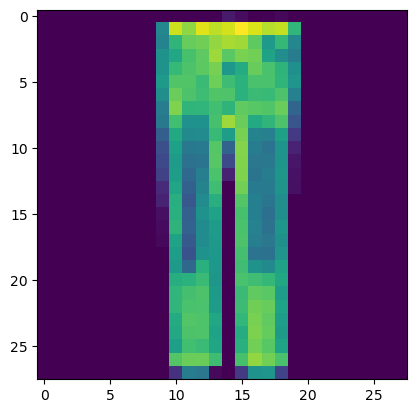

1/1 [==============================] - 0s 16ms/step
pullover


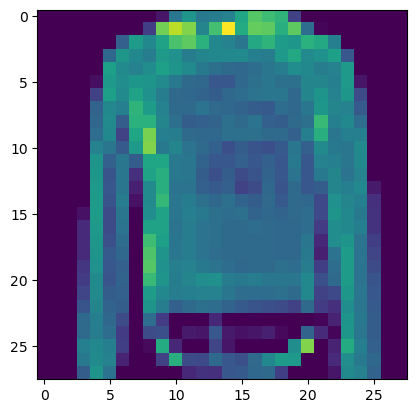

1/1 [==============================] - 0s 17ms/step
coat


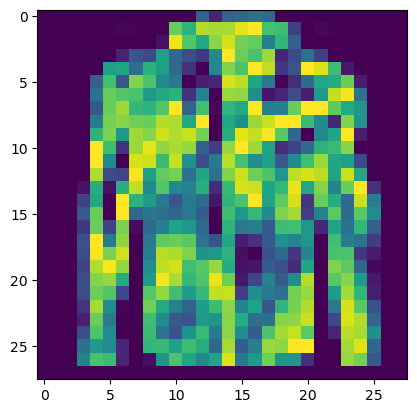

1/1 [==============================] - 0s 16ms/step
bag


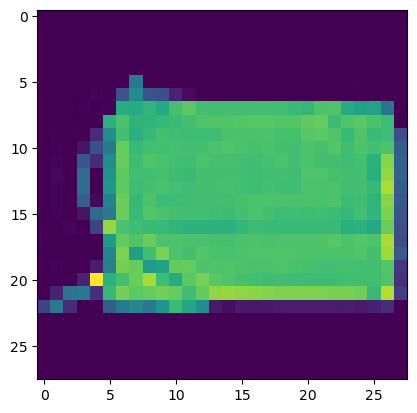

1/1 [==============================] - 0s 17ms/step
t_shirt


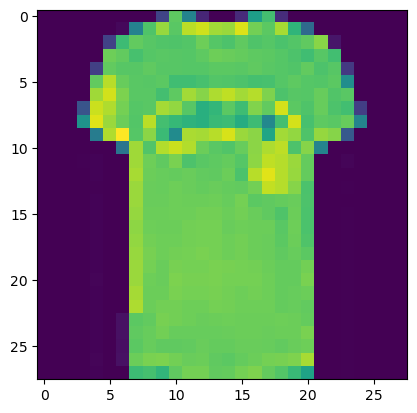

1/1 [==============================] - 0s 16ms/step
pullover


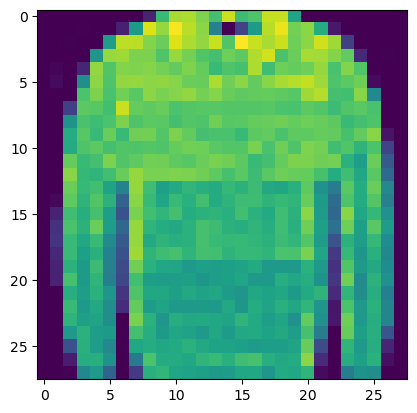

1/1 [==============================] - 0s 17ms/step
sneaker


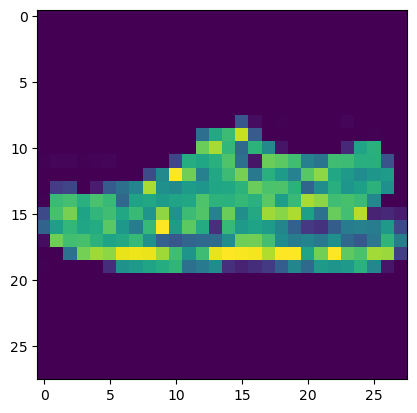

1/1 [==============================] - 0s 16ms/step
sneaker


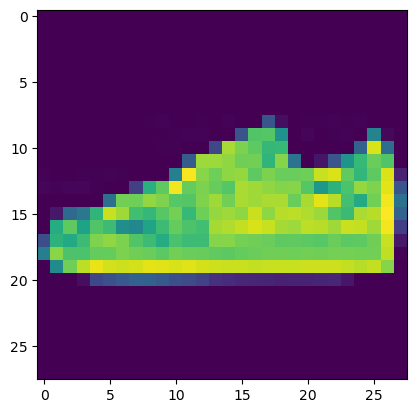

1/1 [==============================] - 0s 17ms/step
sandal


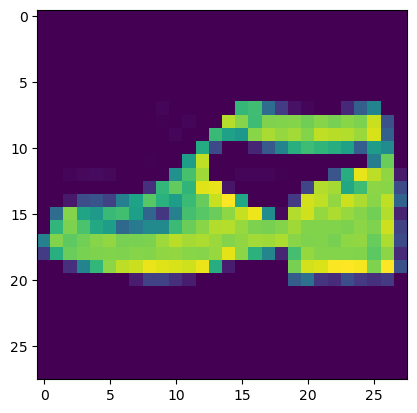

1/1 [==============================] - 0s 17ms/step
trouser


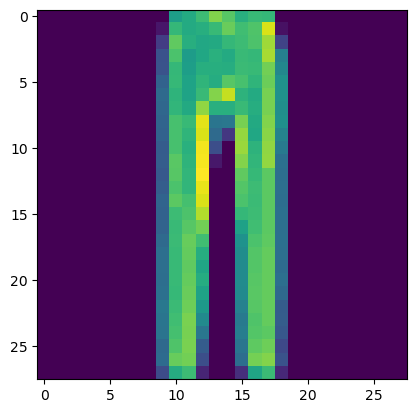

In [24]:
for i in range(15,25):
    predict(i)